## Метод опорных векторов (SVM)


In [1]:
import random
import numpy as np
from rd.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Загрузка данных:

In [2]:
cifar10_dir = 'rd/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Массив тренировочных данных - размер: ', X_train.shape)
print('Массив тренировочных меток - размер: ', y_train.shape)
print('Массив тестовых данных - размер: ', X_test.shape)
print('Массив тестовых меток - размер: ', y_test.shape)

Массив тренировочных данных - размер:  (50000, 32, 32, 3)
Массив тренировочных меток - размер:  (50000,)
Массив тестовых данных - размер:  (10000, 32, 32, 3)
Массив тестовых меток - размер:  (10000,)


Разбитие данных на тренировочный, проверочный и тестовый наборы. Здесь `dev` - набор для разработки, будет использован ниже.

In [3]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Массив тренировочных данных - размер: ', X_train.shape)
print('Массив тренировочных меток - размер: ', y_train.shape)
print('Массив проверочных данных - размер: ', X_val.shape)
print('Массив проверочных меток - размер: ', y_val.shape)
print('Массив тестовых данных - размер: ', X_test.shape)
print('Массив тестовых меток - размер: ', y_test.shape)

Массив тренировочных данных - размер:  (49000, 32, 32, 3)
Массив тренировочных меток - размер:  (49000,)
Массив проверочных данных - размер:  (1000, 32, 32, 3)
Массив проверочных меток - размер:  (1000,)
Массив тестовых данных - размер:  (1000, 32, 32, 3)
Массив тестовых меток - размер:  (1000,)


In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print('Массив тренировочных данных - размер: ', X_train.shape)
print('Массив проверочных данных - размер: ', X_val.shape)
print('Массив тестовых данных - размер: ', X_test.shape)
print('Массив данных для разработки - размер: ', X_dev.shape)

Массив тренировочных данных - размер:  (49000, 3072)
Массив проверочных данных - размер:  (1000, 3072)
Массив тестовых данных - размер:  (1000, 3072)
Массив данных для разработки - размер:  (500, 3072)


Предобработка:
- отнять среднее значение тренировочных данных от всех входных данных
- добавить 1 вместо дополнительного параметра для отклонения (bias)

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


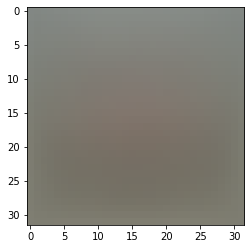

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [5]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

### Классификатор SVM

Код находится в `rd/classifiers/linear_svm.py`. 

Метод `svm_loss_naive`, использующий циклы, предоставлен:

In [6]:
from rd.classifiers.linear_svm import svm_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('потеря: %f' % (loss, ))

потеря: 9.103173


Все элементы `grad` (выше) равны нулю. 

#### Задание 1

Реализовать вычисление градиента для функции потерь SVM в методе svm_loss_naive.

In [7]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

#### Задание 2

Реализовать вычисление потери и градиента в методе svm_loss_vectorized. Потери и градиент должны совпадать с наивным методом.

In [8]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Наивная потеря: %e вычислена за %fs' % (loss_naive, toc - tic))

from rd.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Векторизированная потеря: %e вычислена за %fs' % (loss_vectorized, toc - tic))

print('разность потерь: %f' % (loss_naive - loss_vectorized))

Наивная потеря: 9.103173e+00 вычислена за 0.016913s
Векторизированная потеря: 0.000000e+00 вычислена за 0.000305s
разность потерь: 9.103173


In [9]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Наивный метод: %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Векторизированный метод: %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('разница: %f' % difference)

Наивный метод: 0.015076s
Векторизированный метод: 0.000425s
разница: 0.000000


### Градиентный спуск

#### Задание 3
В файле `rd/classifiers/linear_classifier.py` в методе `LinearClassifier.train()`, применить градиентный спуск для минимизации потери.

In [10]:
from rd.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('Заняло %fs' % (toc - tic))

итерация 0 / 1500: потеря 0.000000
итерация 100 / 1500: потеря 0.000000
итерация 200 / 1500: потеря 0.000000
итерация 300 / 1500: потеря 0.000000
итерация 400 / 1500: потеря 0.000000
итерация 500 / 1500: потеря 0.000000
итерация 600 / 1500: потеря 0.000000
итерация 700 / 1500: потеря 0.000000
итерация 800 / 1500: потеря 0.000000
итерация 900 / 1500: потеря 0.000000
итерация 1000 / 1500: потеря 0.000000
итерация 1100 / 1500: потеря 0.000000
итерация 1200 / 1500: потеря 0.000000
итерация 1300 / 1500: потеря 0.000000
итерация 1400 / 1500: потеря 0.000000
Заняло 0.022343s


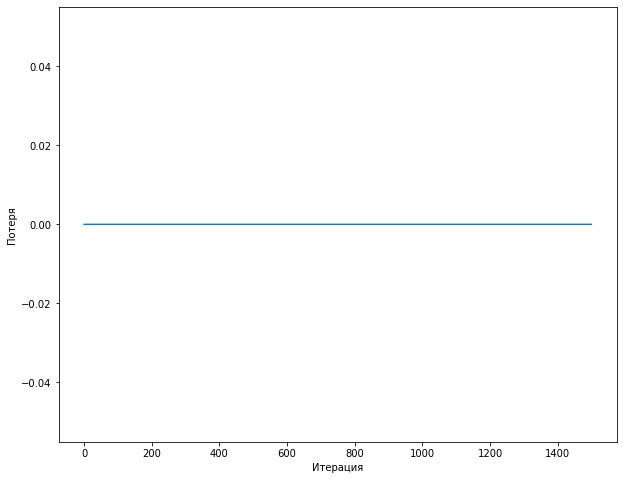

In [11]:
plt.plot(loss_hist)
plt.xlabel('Итерация')
plt.ylabel('Потеря')
plt.show()

#### Задание 4
Заполните метод `LinearClassifier.predict()`, оцените результат на обучающем и проверочном наборах данных.

In [12]:
y_train_pred = svm.predict(X_train)
print('Тренировочная точность: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('Проверочная точность: %f' % (np.mean(y_val == y_val_pred), ))

Тренировочная точность: 0.100265
Проверочная точность: 0.087000


#### Задание 5
Заполните метод `LinearClassifier.predict()`, оцените результат на обучающем и проверочном наборах данных.

Используйте набор проверки для настройки гиперпараметров (уровень регуляризации и скорость обучения). Вы должны поэкспериментировать с разными диапазонами, вы сможете получить точность классификации около 0,39 на проверочном наборе.

*Примечание:* вы можете увидеть предупреждения runtime/overflow во время поиска гиперпараметров. Это может быть вызвано экстремальными значениями и не является ошибкой.

Результат: словарь `results` с ключами в форме (скорость_обучения, сила_регуляризации) и значениями в форме (тренировочная_точность, проверочная_точность).

In [13]:
results = {}
best_val = -1
best_svm = None

# значения для примера
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

# *****НАЧАЛО ВАШЕГО КОДА (НЕ УДАЛЯЙТЕ / ИЗМЕНЯЙТЕ ЭТУ СТРОКУ)*****

pass

# *****КОНЕЦ ВАШЕГО КОДА (НЕ УДАЛЯЙТЕ / ИЗМЕНЯЙТЕ ЭТУ СТРОКУ)*****
    
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('лучшая проверочная точность, достигнутая при перекрестной проверке: %f' % best_val)

лучшая проверочная точность, достигнутая при перекрестной проверке: -1.000000


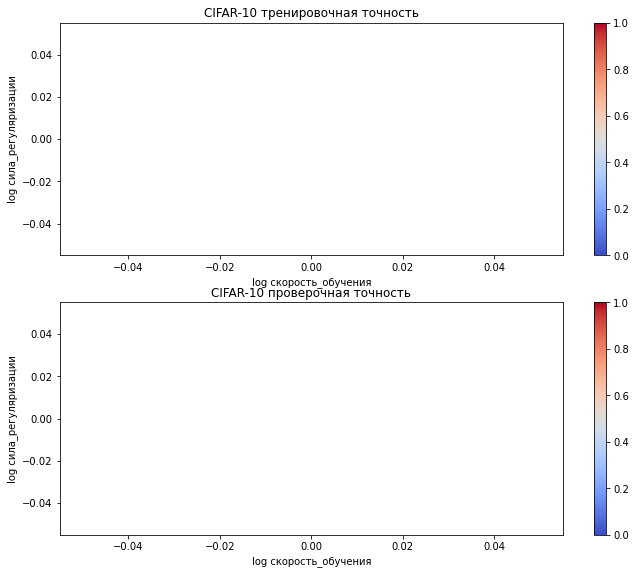

In [14]:
# Визаулизация
import math
import pdb

x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.tight_layout(pad=3)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log скорость_обучения')
plt.ylabel('log сила_регуляризации')
plt.title('CIFAR-10 тренировочная точность')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log скорость_обучения')
plt.ylabel('log сила_регуляризации')
plt.title('CIFAR-10 проверочная точность')
plt.show()

In [15]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Тестовая точность: %f' % test_accuracy)

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
# Визуализация весов
w = best_svm.W[:-1,:] # убрать bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
      
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])